In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("spacex.csv")

In [3]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,ReusedCore,...,ReusedFairings,CostCoreMil,CostFairingsMil,CostOtherMil,CostKgMil,CostTotalMil,RevenueReuseMil,RevenueKgMil,RevenueTotalMil,ProfitMil
0,1,6/4/2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,0,0,...,0,30000000.0,6000000.0,14000000.0,42734715.88,92734715.88,62000000.0,61049594.12,123049594.1,30314878.22
1,2,5/22/2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,0,0,...,0,30000000.0,6000000.0,14000000.0,3675000.00,53675000.00,62000000.0,5250000.00,67250000.0,13575000.00
2,3,3/1/2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,0,0,...,0,30000000.0,6000000.0,14000000.0,4739000.00,54739000.00,62000000.0,6770000.00,68770000.0,14031000.00
3,4,9/29/2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,0,0,...,0,30000000.0,6000000.0,14000000.0,3500000.00,53500000.00,62000000.0,5000000.00,67000000.0,13500000.00
4,5,12/3/2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,0,0,...,0,30000000.0,6000000.0,14000000.0,22190000.00,72190000.00,62000000.0,31700000.00,93700000.0,21510000.00


In [4]:
# Data Preprocessing

In [5]:
#cheak null value
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
ReusedCore         0
Legs               0
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
Class              0
Year               0
ReusedFairings     0
CostCoreMil        0
CostFairingsMil    0
CostOtherMil       0
CostKgMil          0
CostTotalMil       0
RevenueReuseMil    0
RevenueKgMil       0
RevenueTotalMil    0
ProfitMil          0
dtype: int64

In [6]:
#to see unique value
for i in df.columns:
    print("*********",i,"*********")
    print()
    print(set(df[i].tolist()))
    print()

********* FlightNumber *********

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90}

********* Date *********

{'4/8/2016', '5/27/2016', '3/2/2019', '7/22/2018', '12/5/2018', '1/7/2020', '7/14/2014', '8/24/2017', '6/4/2020', '1/14/2017', '9/7/2017', '5/30/2020', '7/5/2017', '5/11/2018', '12/22/2015', '8/30/2020', '12/15/2017', '6/4/2010', '9/7/2014', '4/18/2018', '10/11/2017', '9/21/2014', '4/14/2015', '6/3/2017', '6/29/2018', '3/4/2016', '6/28/2015', '1/19/2020', '10/24/2020', '5/22/2012', '8/14/2016', '11/15/2018', '5/1/2017', '10/8/2018', '2/11/2015', '12/3/2018', '2/19/2017', '7/25/2018', '1/8/2018', '4/2/2018', '5/4/2019', '2/17/2020', '12/23/2018', '1/10/2015', '9/29/2013', '1/17/201

# EDA

In [7]:
df['LaunchSite'].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [8]:
df['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [9]:
df['Outcome'].value_counts()

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [10]:
landing_outcomes={'True ASDS':41,
'None None':19,
'True RTLS':14,
'False ASDS':6,
'True Ocean':5,
'False Ocean':2,
'None ASDS' :2,
'False RTLS' :1}

In [11]:
for i, outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [12]:
bad_outcomes=set(["None None","False ASDS","False Ocean","False RTLS","None ASDS"])

In [13]:
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [14]:
#landing class =0, bad_outcome
#landing_class=1 otherwise

In [15]:
landing_class=[]
for i in df['Outcome']:
    if(i in bad_outcomes):
        landing_class.append(0)
    else:
        landing_class.append(1)

In [16]:
df['class']=landing_class
df[['class']].head()

,class
0,0
1,0
2,0
3,0
4,0


In [17]:
df['class'].value_counts()

1    60
0    30
Name: class, dtype: int64

In [18]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,ReusedCore,...,CostCoreMil,CostFairingsMil,CostOtherMil,CostKgMil,CostTotalMil,RevenueReuseMil,RevenueKgMil,RevenueTotalMil,ProfitMil,class
0,1,6/4/2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,0,0,...,30000000.0,6000000.0,14000000.0,42734715.88,92734715.88,62000000.0,61049594.12,123049594.1,30314878.22,0
1,2,5/22/2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,0,0,...,30000000.0,6000000.0,14000000.0,3675000.00,53675000.00,62000000.0,5250000.00,67250000.0,13575000.00,0
2,3,3/1/2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,0,0,...,30000000.0,6000000.0,14000000.0,4739000.00,54739000.00,62000000.0,6770000.00,68770000.0,14031000.00,0
3,4,9/29/2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,0,0,...,30000000.0,6000000.0,14000000.0,3500000.00,53500000.00,62000000.0,5000000.00,67000000.0,13500000.00,0
4,5,12/3/2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,0,0,...,30000000.0,6000000.0,14000000.0,22190000.00,72190000.00,62000000.0,31700000.00,93700000.0,21510000.00,0


# Data visualization

C:\Users\realme\AppData\Local\Temp\ipykernel_3148\1045002650.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='summer')


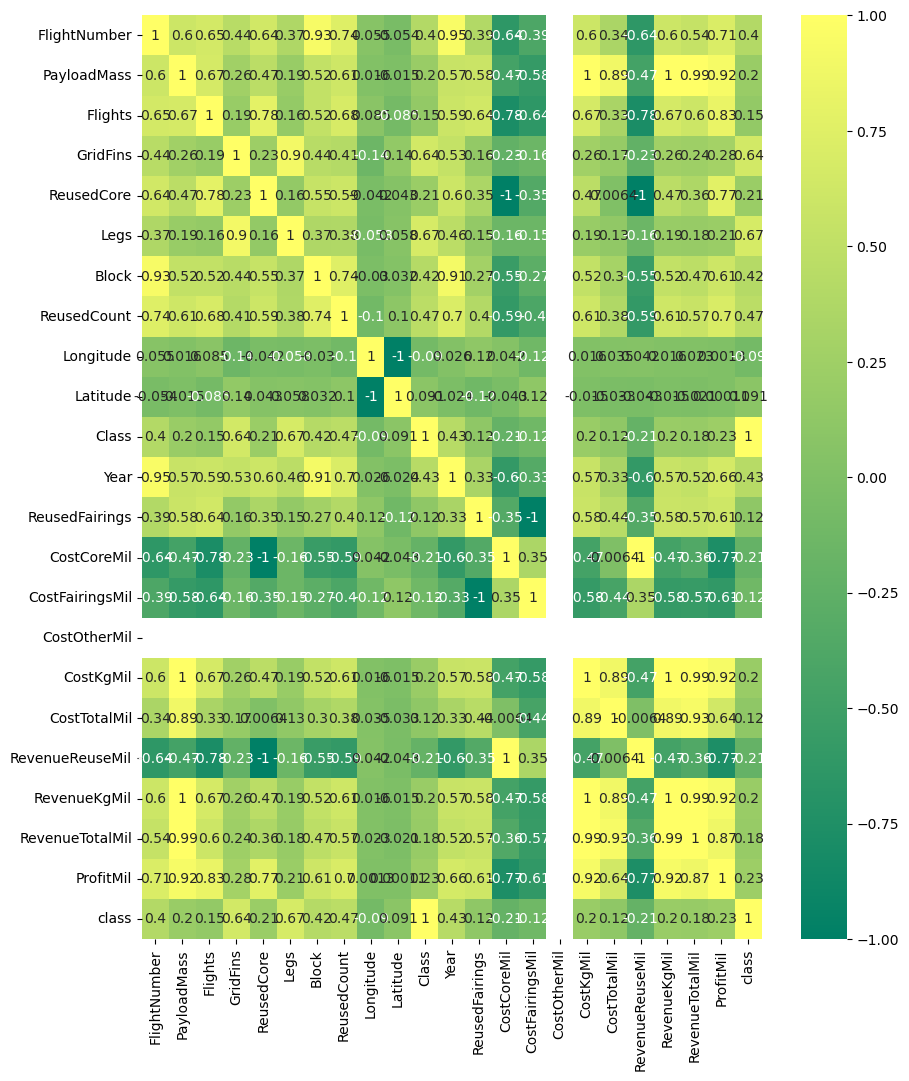

In [19]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr(),annot=True,cmap='summer')
plt.show()

Text(0.5, 1.0, 'PayloadMass v/s FlightNumber')

<Figure size 2000x1500 with 0 Axes>

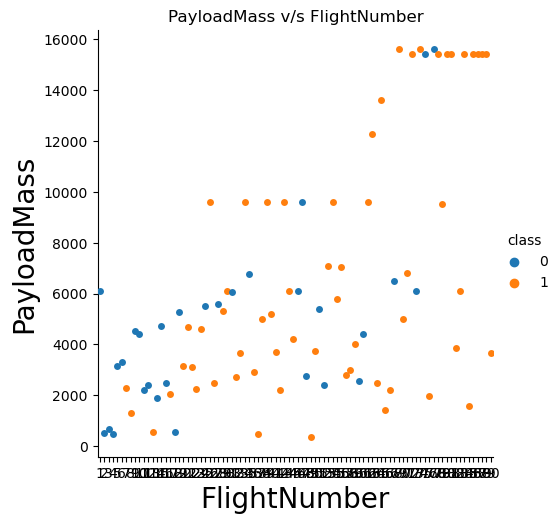

In [20]:
plt.figure(figsize=(20,15))
sns.catplot(y='PayloadMass',x='FlightNumber',hue='class',data=df,aspect=True)
plt.xlabel('FlightNumber',fontsize=20)
plt.ylabel("PayloadMass",fontsize=20)
plt.title('PayloadMass v/s FlightNumber' )

As the flightnumber increase .the first  stage is more likely to land successfully.the payload mass is also important. it seens the more massive the payload.the less likely the first stage will return  

<Axes: xlabel='LaunchSite', ylabel='class'>

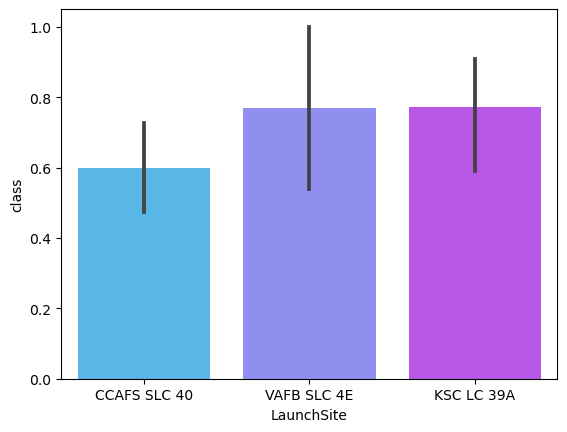

In [21]:
#Success rate of launch site
sns.barplot(data=df,y='class',x='LaunchSite',palette='cool')

Text(0.5, 1.0, 'Scatter plot of flight Nuber of Launch site')

<Figure size 2000x1500 with 0 Axes>

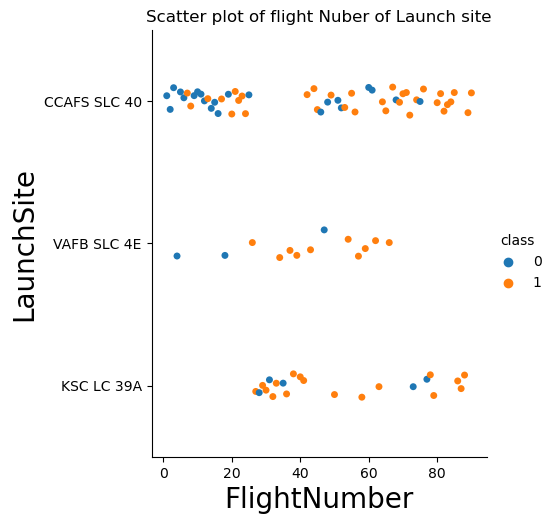

In [22]:
#visualize relationship btween flightnumber and launchsite
plt.figure(figsize=(20,15))
sns.catplot(y='LaunchSite',x='FlightNumber',hue='class',data=df,aspect=True)
plt.xlabel('FlightNumber',fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.title('Scatter plot of flight Nuber of Launch site' )

Text(0, 0.5, 'PayloadMass')

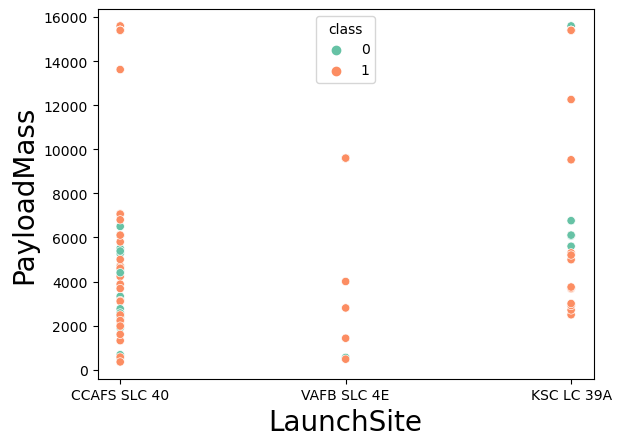

In [23]:
#visualize relationship btween payload and launchsite
sns.scatterplot(x='LaunchSite',y='PayloadMass',hue='class',data=df,palette='Set2')
plt.xlabel('LaunchSite',fontsize=20)
plt.ylabel("PayloadMass",fontsize=20)

for the VAFB -SLC launchsite thre are no rocket launched for heavypayload mass (greater than 10000)

C:\Users\realme\AppData\Local\Temp\ipykernel_3148\281155178.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_orbit=df.groupby('Orbit',axis=0).mean()


Text(0.5, 1.0, 'Success rate of each orbit')

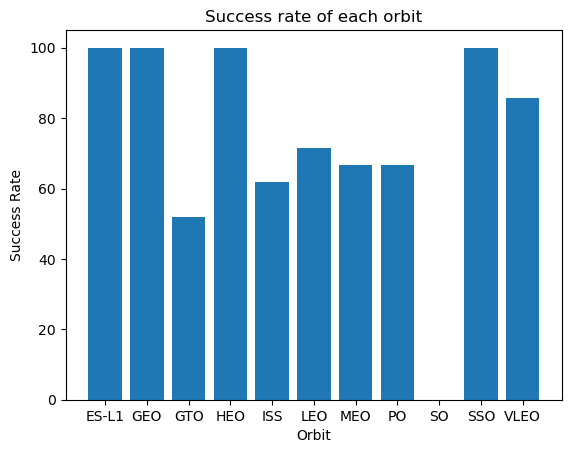

In [24]:
#visualize cheak if there are any relationship btween success rate and orbit type
df_orbit=df.groupby('Orbit',axis=0).mean()
df_orbit['SR']=df_orbit['class']*100
plt.bar(df_orbit.index,df_orbit['SR'])
plt.xlabel('Orbit')
plt.ylabel('Success Rate')
plt.title('Success rate of each orbit')

Text(0, 0.5, 'Orbit')

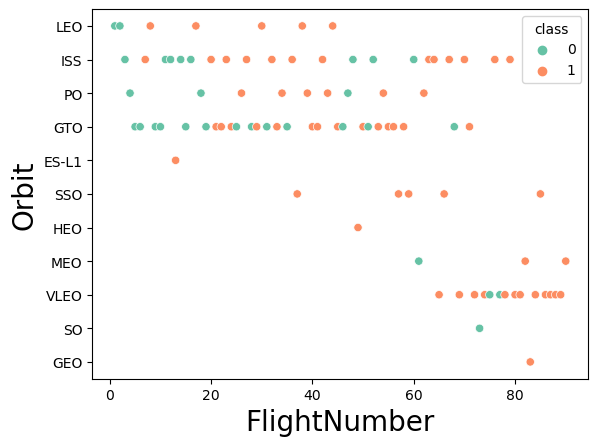

In [25]:
#there is any relationship btween flight number and orbit type
sns.scatterplot(x='FlightNumber',y='Orbit',hue='class',data=df,palette='Set2')
plt.xlabel('FlightNumber',fontsize=20)
plt.ylabel("Orbit",fontsize=20)

You should see that in the LEO orbit the success appears related to the numberof
flight: on the other thre are seems to no relationship btween flight number when in GTO orbit

Text(0, 0.5, 'Orbit')

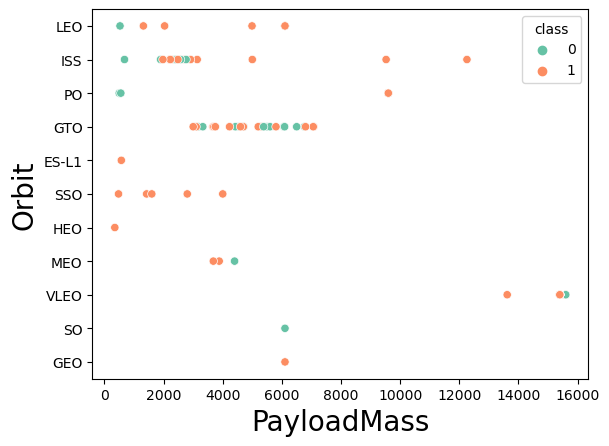

In [26]:
#cheak the relation btween orbit and payloadmass
sns.scatterplot(x='PayloadMass',y='Orbit',hue='class',data=df,palette='Set2')
plt.xlabel('PayloadMass',fontsize=20)
plt.ylabel("Orbit",fontsize=20)

With heavy payload the successfully landing or passitive landing rate are  more for polar ,LEO and ISS

However for GTO  we cannot distinguish this well  as both passitive landing rate and negative landing
(Unsuccessfully misson )are both there are

In [27]:
#plotting the success rate with year
df['Year']=df['Date'].apply(lambda x:  str(x).split('/')[0])

In [28]:
df['Year']

0      6
1      5
2      3
3      9
4     12
      ..
85     9
86    10
87    10
88    10
89    11
Name: Year, Length: 90, dtype: object

In [29]:
#df['Year']=df['Date'].apply(lambda x:str(x).split('//')[0])
date=df.groupby('Year').mean()
date['SR']=date['class']*100
date.head()

C:\Users\realme\AppData\Local\Temp\ipykernel_3148\1682006499.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  date=df.groupby('Year').mean()


,FlightNumber,PayloadMass,Flights,GridFins,ReusedCore,Legs,Block,ReusedCount,Longitude,Latitude,...,CostFairingsMil,CostOtherMil,CostKgMil,CostTotalMil,RevenueReuseMil,RevenueKgMil,RevenueTotalMil,ProfitMil,class,SR
Year,,,,,,,,,,,,,,,,,,,,,
1,43.200000,7291.291882,2.000000,0.800000,0.500000,0.800000,3.300000,2.100000,-92.590064,30.387548,...,6000000.0,14000000.0,5.103904e+07,8.616404e+07,5.600000e+07,7.291292e+07,1.289129e+08,4.274888e+07,0.600000,60.000000
10,63.000000,9642.857143,2.571429,1.000000,0.714286,1.000000,4.428571,2.142857,-92.030692,30.322611,...,4500000.0,14000000.0,6.750000e+07,9.475000e+07,5.342857e+07,9.642857e+07,1.498571e+08,5.510714e+07,1.000000,100.000000
11,72.333333,7427.000000,2.333333,1.000000,0.666667,1.000000,5.000000,2.000000,-80.586229,28.577258,...,4250000.0,14000000.0,5.198900e+07,8.040567e+07,5.400000e+07,7.427000e+07,1.282700e+08,4.786433e+07,1.000000,100.000000
12,47.555556,4420.222222,1.666667,0.777778,0.444444,0.666667,3.666667,1.222222,-89.473691,29.910798,...,6000000.0,14000000.0,3.094156e+07,6.771933e+07,5.666667e+07,4.420222e+07,1.008689e+08,3.314956e+07,0.666667,66.666667
2,38.333333,6153.333333,2.000000,1.000000,0.333333,1.000000,3.000000,1.333333,-80.586229,28.577258,...,6000000.0,14000000.0,4.307333e+07,8.315667e+07,5.800000e+07,6.153333e+07,1.195333e+08,3.637667e+07,0.666667,66.666667


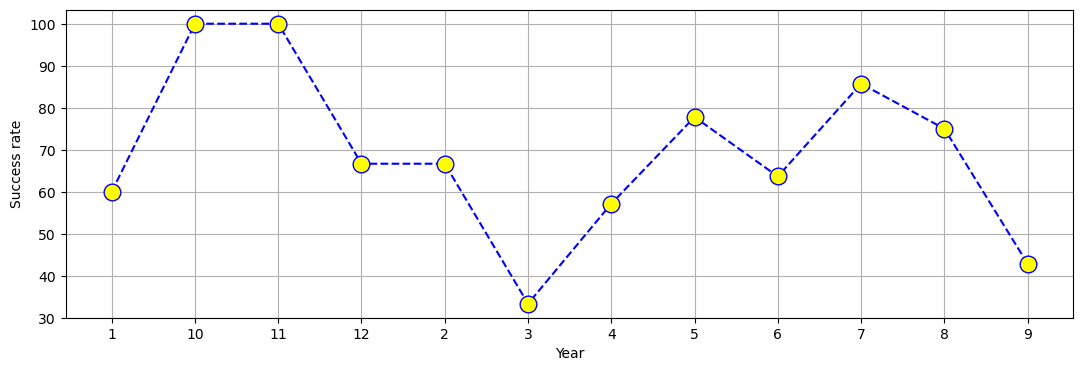

In [30]:
plt.figure (figsize=(13,4))
plt.plot(date.index,date['SR'],color='blue',linestyle='dashed',marker='o',
        markersize=12,markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Success rate')
plt.grid(True)
plt.show()

Since there  is  observed to success rate to 2002 to 2012 then increasing and decresing

# Feature engineering

In [31]:
#columns requred for modeling
data=df[['FlightNumber','PayloadMass','Orbit','LaunchSite','Flights','GridFins','Legs','Block','ReusedCount','class','ReusedCore','ReusedFairings']]

In [32]:
data.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Legs,Block,ReusedCount,class,ReusedCore,ReusedFairings
0,1,6104.959412,LEO,CCAFS SLC 40,1,0,0,1,0,0,0,0
1,2,525.000000,LEO,CCAFS SLC 40,1,0,0,1,0,0,0,0
2,3,677.000000,ISS,CCAFS SLC 40,1,0,0,1,0,0,0,0
3,4,500.000000,PO,VAFB SLC 4E,1,0,0,1,0,0,0,0
4,5,3170.000000,GTO,CCAFS SLC 40,1,0,0,1,0,0,0,0


# Encoding

In [33]:
#one hot encoding for the column orbit -- lounchsite
data=pd.get_dummies(data,columns=['Orbit','LaunchSite'],drop_first=True)

In [34]:
data.head()

,FlightNumber,PayloadMass,Flights,GridFins,Legs,Block,ReusedCount,class,ReusedCore,ReusedFairings,...,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E
0,1,6104.959412,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,525.000000,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,677.000000,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,500.000000,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,5,3170.000000,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#split the data into dependent and independent varible
X=data.drop('class',axis=1)
y=data['class']

In [36]:
#cheak the counts
y.value_counts()

1    60
0    30
Name: class, dtype: int64

# feature scalling

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaler=scaler.fit_transform(X)

In [38]:
pd.DataFrame(x_scaler,columns=X.columns).head()

,FlightNumber,PayloadMass,Flights,GridFins,Legs,Block,ReusedCount,ReusedCore,ReusedFairings,Orbit_GEO,...,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E
0,-1.712912,4.759999e-11,-0.653913,-1.870829,-1.933091,-1.575895,-0.97344,-0.835532,-0.290409,-0.106,...,-0.106,-0.551677,3.443420,-0.185695,-0.333333,-0.106,-0.242536,-0.429198,-0.568796,-0.410891
1,-1.674419,-1.195232e+00,-0.653913,-1.870829,-1.933091,-1.575895,-0.97344,-0.835532,-0.290409,-0.106,...,-0.106,-0.551677,3.443420,-0.185695,-0.333333,-0.106,-0.242536,-0.429198,-0.568796,-0.410891
2,-1.635927,-1.162673e+00,-0.653913,-1.870829,-1.933091,-1.575895,-0.97344,-0.835532,-0.290409,-0.106,...,-0.106,1.812654,-0.290409,-0.185695,-0.333333,-0.106,-0.242536,-0.429198,-0.568796,-0.410891
3,-1.597434,-1.200587e+00,-0.653913,-1.870829,-1.933091,-1.575895,-0.97344,-0.835532,-0.290409,-0.106,...,-0.106,-0.551677,-0.290409,-0.185695,3.000000,-0.106,-0.242536,-0.429198,-0.568796,2.433737
4,-1.558942,-6.286706e-01,-0.653913,-1.870829,-1.933091,-1.575895,-0.97344,-0.835532,-0.290409,-0.106,...,-0.106,-0.551677,-0.290409,-0.185695,-0.333333,-0.106,-0.242536,-0.429198,-0.568796,-0.410891


In [39]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Function to  plot the confusion metrics

In [40]:

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y, y_predict):
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title('Confusion matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])  # Enclosed labels in quotes
    ax.yaxis.set_ticklabels(['did not land', 'land'])  # Enclosed labels in quotes
    plt.show()


# Logistic Regression

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Example with a different solver (e.g., 'liblinear')
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [42]:
#prdictions
train_pred_lr=lr.predict(X_train)
test_pred_lr=lr.predict(X_test)

In [43]:
#evaluate the metrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

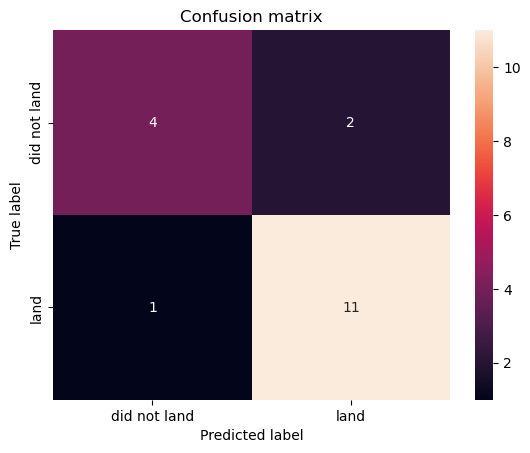

In [44]:
plot_confusion_matrix(y_test,test_pred_lr)

In [45]:
print(classification_report(y_train,train_pred_lr))
print()
print(classification_report(y_test,test_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.88      0.96      0.92        48

    accuracy                           0.89        72
   macro avg       0.89      0.85      0.87        72
weighted avg       0.89      0.89      0.89        72


              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.85      0.92      0.88        12

    accuracy                           0.83        18
   macro avg       0.82      0.79      0.80        18
weighted avg       0.83      0.83      0.83        18



In [46]:
#list to  store the accuracy value
train_accu=[]
test_accu=[]
train_mean = []
test_mean = []

In [47]:
print(accuracy_score(y_train,train_pred_lr))
train_accu.append(accuracy_score(y_train,train_pred_lr))
print()
print(accuracy_score(y_test,test_pred_lr))
test_accu.append(accuracy_score(y_test,test_pred_lr))

0.8888888888888888

0.8333333333333334


In [48]:
#cross validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(lr, X_train, y_train, cv=10)
test_accuracy = cross_val_score(lr, X_test, y_test, cv=10)
print('Train accuracy:', training_accuracy)
print()
print('Train mean accuracy:', training_accuracy.mean())
print('Train max accuracy:', training_accuracy.max())
print()
print('Test accuracy:', test_accuracy)
print()
print('Test mean accuracy:', test_accuracy.mean())
print()
print('Test max accuracy:', test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())


Train accuracy: [0.625      0.875      0.85714286 0.71428571 1.         0.85714286
 1.         0.85714286 0.85714286 0.85714286]

Train mean accuracy: 0.85
Train max accuracy: 1.0

Test accuracy: [1.  0.5 1.  0.5 1.  1.  0.5 0.5 1.  1. ]

Test mean accuracy: 0.8

Test max accuracy: 1.0


C:\Users\realme\anaconda4\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


# Decision Tree


In [49]:

from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier instance
dtree = DecisionTreeClassifier(criterion='gini', max_depth=14, min_samples_split=10, splitter='random')

# Fit the model
dtree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=14, min_samples_split=10, splitter='random')

In [50]:
#predictions
train_pred_dtree=dtree.predict(X_train)
test_pred_dtree=dtree.predict(X_test)

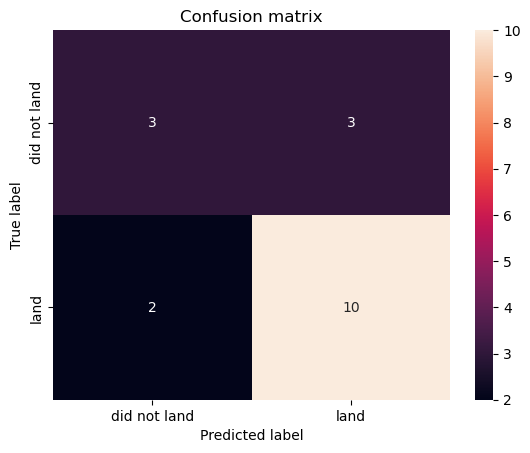

In [51]:
#confusion metrix
plot_confusion_matrix(y_test,test_pred_dtree)

In [52]:
print(classification_report(y_train,train_pred_dtree))
print()
print(classification_report(y_test,test_pred_dtree))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81        24
           1       0.87      0.98      0.92        48

    accuracy                           0.89        72
   macro avg       0.91      0.84      0.87        72
weighted avg       0.90      0.89      0.88        72


              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.77      0.83      0.80        12

    accuracy                           0.72        18
   macro avg       0.68      0.67      0.67        18
weighted avg       0.71      0.72      0.72        18



In [53]:
print(accuracy_score(y_train,train_pred_dtree))
train_accu.append(accuracy_score(y_train,train_pred_dtree))
print()
print(accuracy_score(y_test,test_pred_dtree))
test_accu.append(accuracy_score(y_test,test_pred_dtree))

0.8888888888888888

0.7222222222222222


In [54]:
#cross validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(dtree, X_train, y_train, cv=10)
test_accuracy = cross_val_score(dtree, X_test, y_test, cv=10)
print('Train accuracy:', training_accuracy)
print()
print('Train mean accuracy:', training_accuracy.mean())
print('Train max accuracy:', training_accuracy.max())
print()
print('Test accuracy:', test_accuracy)
print()
print('Test mean accuracy:', test_accuracy.mean())
print()
print('Test max accuracy:', test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())


Train accuracy: [0.5        0.875      0.85714286 0.85714286 0.85714286 1.
 1.         0.85714286 0.85714286 0.85714286]

Train mean accuracy: 0.8517857142857143
Train max accuracy: 1.0

Test accuracy: [0.5 0.5 1.  1.  1.  0.5 0.5 1.  0.  1. ]

Test mean accuracy: 0.7

Test max accuracy: 1.0


C:\Users\realme\anaconda4\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


# Random forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()
rfr.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
#predictions
train_pred_rfr=rfr.predict(X_train)
test_pred_rfr=rfr.predict(X_test)

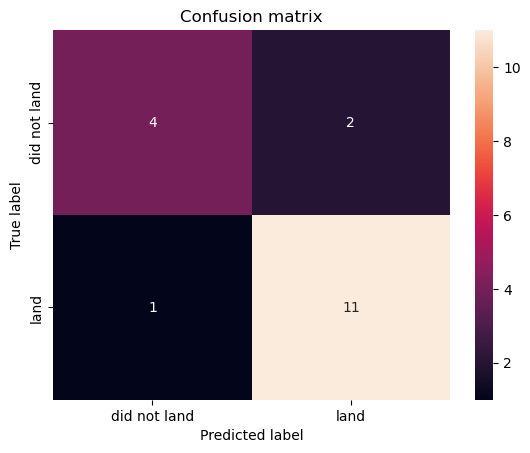

In [57]:
#confusion metrix
plot_confusion_matrix(y_test,test_pred_rfr)

In [58]:
print(classification_report(y_train,train_pred_rfr))
print()
print(classification_report(y_test,test_pred_rfr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        48

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72


              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.85      0.92      0.88        12

    accuracy                           0.83        18
   macro avg       0.82      0.79      0.80        18
weighted avg       0.83      0.83      0.83        18



In [59]:
print(accuracy_score(y_train,train_pred_rfr))
train_accu.append(accuracy_score(y_train,train_pred_rfr))
print()
print(accuracy_score(y_test,test_pred_rfr))
test_accu.append(accuracy_score(y_test,test_pred_rfr))

1.0

0.8333333333333334


In [60]:
#cross validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rfr, X_train, y_train, cv=10)
test_accuracy = cross_val_score(rfr, X_test, y_test, cv=10)
print('Train accuracy:', training_accuracy)
print()
print('Train mean accuracy:', training_accuracy.mean())
print('Train max accuracy:', training_accuracy.max())
print()
print('Test accuracy:', test_accuracy)
print()
print('Test mean accuracy:', test_accuracy.mean())
print()
print('Test max accuracy:', test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

C:\Users\realme\anaconda4\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


Train accuracy: [0.625      0.875      0.85714286 0.85714286 1.         1.
 1.         0.85714286 0.71428571 0.85714286]

Train mean accuracy: 0.8642857142857142
Train max accuracy: 1.0

Test accuracy: [1.  0.5 1.  1.  1.  1.  0.5 1.  0.  1. ]

Test mean accuracy: 0.8

Test max accuracy: 1.0


# XGBOOST

In [61]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [62]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [63]:
#predictions
train_pred_xgb=rfr.predict(X_train)
test_pred_xgb=rfr.predict(X_test)

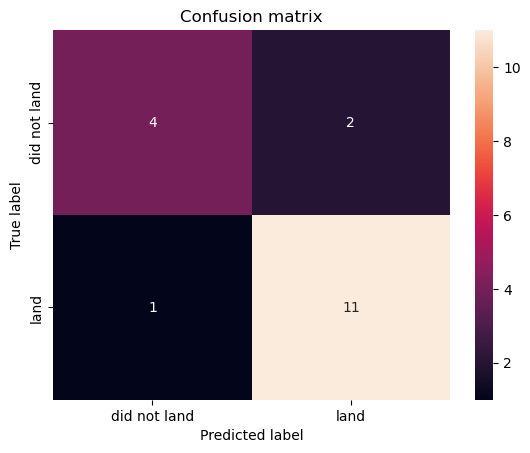

In [64]:
#confusion metrix
plot_confusion_matrix(y_test,test_pred_xgb)

In [65]:
print(classification_report(y_train,train_pred_xgb))
print()
print(classification_report(y_test,test_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        48

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72


              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.85      0.92      0.88        12

    accuracy                           0.83        18
   macro avg       0.82      0.79      0.80        18
weighted avg       0.83      0.83      0.83        18



In [66]:
print(accuracy_score(y_train,train_pred_xgb))
train_accu.append(accuracy_score(y_train,train_pred_xgb))
print()
print(accuracy_score(y_test,test_pred_xgb))
test_accu.append(accuracy_score(y_test,test_pred_xgb))

1.0

0.8333333333333334


In [67]:
#cross validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb, X_train, y_train, cv=10)
test_accuracy = cross_val_score(xgb, X_test, y_test, cv=10)
print('Train accuracy:', training_accuracy)
print()
print('Train mean accuracy:', training_accuracy.mean())
print('Train max accuracy:', training_accuracy.max())
print()
print('Test accuracy:', test_accuracy)
print()
print('Test mean accuracy:', test_accuracy.mean())
print()
print('Test max accuracy:', test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

C:\Users\realme\anaconda4\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


Train accuracy: [0.75       0.875      1.         0.85714286 1.         1.
 1.         0.85714286 0.71428571 0.71428571]

Train mean accuracy: 0.8767857142857143
Train max accuracy: 1.0

Test accuracy: [0.5 0.5 1.  0.5 1.  0.5 0.5 1.  0.  1. ]

Test mean accuracy: 0.65

Test max accuracy: 1.0


# KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
error_rate=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

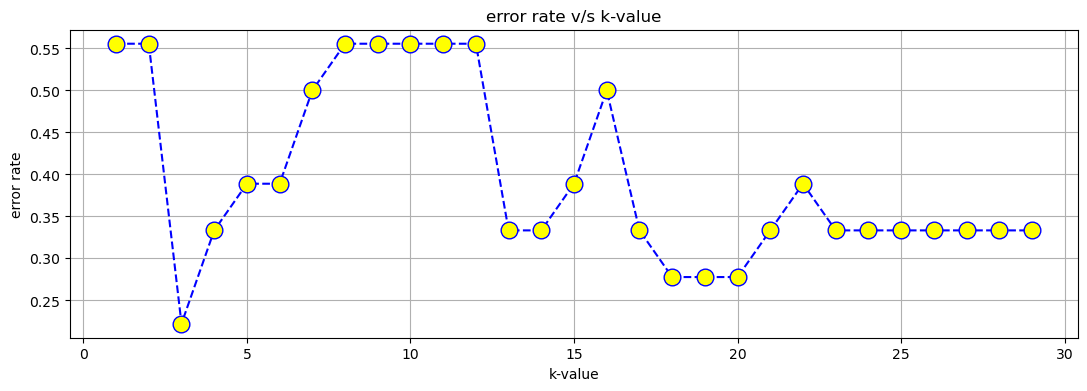

In [70]:
plt.figure (figsize=(13,4))
plt.plot(range(1,30),error_rate,color='blue',linestyle='dashed',marker='o',
        markersize=12,markerfacecolor='yellow')
plt.title('error rate v/s k-value')
plt.xlabel('k-value')
plt.ylabel('error rate')
plt.grid(True)
plt.show()

In [71]:
knn=KNeighborsClassifier(algorithm='auto',n_neighbors=9,p=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

In [72]:
#predictions
train_pred_knn=knn.predict(X_train)
test_pred_knn=knn.predict(X_test)

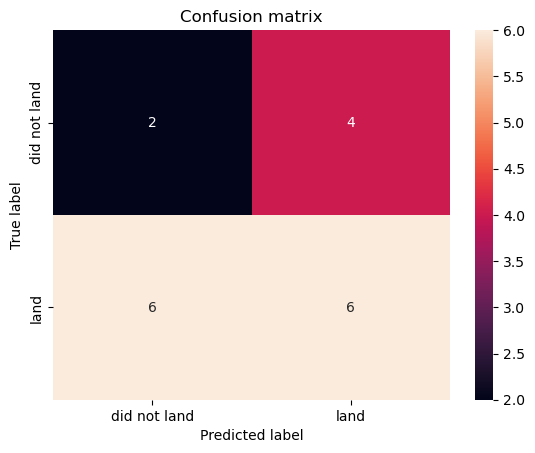

In [73]:
#confusion metrix
plot_confusion_matrix(y_test,test_pred_knn)

In [74]:
print(classification_report(y_train,train_pred_knn))
print()
print(classification_report(y_test,test_pred_knn))

              precision    recall  f1-score   support

           0       0.60      0.38      0.46        24
           1       0.74      0.88      0.80        48

    accuracy                           0.71        72
   macro avg       0.67      0.62      0.63        72
weighted avg       0.69      0.71      0.69        72


              precision    recall  f1-score   support

           0       0.25      0.33      0.29         6
           1       0.60      0.50      0.55        12

    accuracy                           0.44        18
   macro avg       0.42      0.42      0.42        18
weighted avg       0.48      0.44      0.46        18



In [75]:
print(accuracy_score(y_train,train_pred_knn))
train_accu.append(accuracy_score(y_train,train_pred_knn))
print()
print(accuracy_score(y_test,test_pred_knn))
test_accu.append(accuracy_score(y_test,test_pred_knn))

0.7083333333333334

0.4444444444444444


In [76]:
#cross validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(knn, X_train, y_train, cv=10)
test_accuracy = cross_val_score(knn, X_test, y_test, cv=10)
print('Train accuracy:', training_accuracy)
print()
print('Train mean accuracy:', training_accuracy.mean())
print('Train max accuracy:', training_accuracy.max())
print()
print('Test accuracy:', test_accuracy)
print()
print('Test mean accuracy:', test_accuracy.mean())
print()
print('Test max accuracy:', test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

C:\Users\realme\anaconda4\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


Train accuracy: [0.375      0.625      0.57142857 0.71428571 0.57142857 0.71428571
 0.71428571 0.57142857 0.71428571 0.57142857]

Train mean accuracy: 0.6142857142857142
Train max accuracy: 0.7142857142857143

Test accuracy: [0.5 0.5 0.5 0.5 0.5 0.5 1.  1.  1.  1. ]

Test mean accuracy: 0.7

Test max accuracy: 1.0


# SVM

In [77]:
from sklearn.svm import  SVC
svm=SVC(C=1.0 , kernel='rbf')
svm.fit(X_train,y_train)

SVC()

In [78]:
#predictions
train_pred_svm=svm.predict(X_train)
test_pred_svm=svm.predict(X_test)

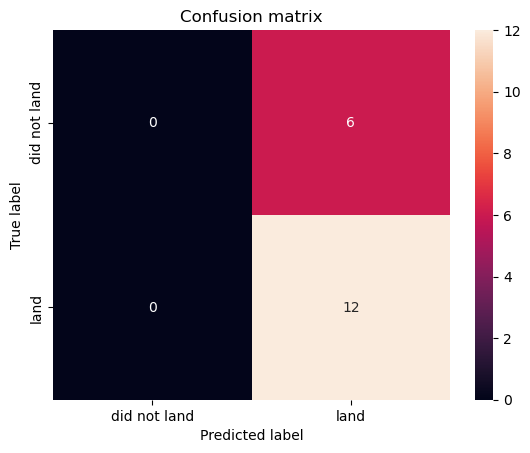

In [79]:
#confusion metrix
plot_confusion_matrix(y_test,test_pred_svm)

In [80]:
print(classification_report(y_train,train_pred_svm))
print()
print(classification_report(y_test,test_pred_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.67      1.00      0.80        48

    accuracy                           0.67        72
   macro avg       0.33      0.50      0.40        72
weighted avg       0.44      0.67      0.53        72


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.67      1.00      0.80        12

    accuracy                           0.67        18
   macro avg       0.33      0.50      0.40        18
weighted avg       0.44      0.67      0.53        18



C:\Users\realme\anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\realme\anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\realme\anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\realme\anaconda4\lib\site-packages\sklearn\

In [81]:
print(accuracy_score(y_train,train_pred_svm))
train_accu.append(accuracy_score(y_train,train_pred_svm))
print()
print(accuracy_score(y_test,test_pred_svm))
test_accu.append(accuracy_score(y_test,test_pred_svm))

0.6666666666666666

0.6666666666666666


In [82]:
#cross validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(svm, X_train, y_train, cv=10)
test_accuracy = cross_val_score(svm, X_test, y_test, cv=10)
print('Train accuracy:', training_accuracy)
print()
print('Train mean accuracy:', training_accuracy.mean())
print('Train max accuracy:', training_accuracy.max())
print()
print('Test accuracy:', test_accuracy)
print()
print('Test mean accuracy:', test_accuracy.mean())
print()
print('Test max accuracy:', test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

Train accuracy: [0.625      0.625      0.71428571 0.71428571 0.71428571 0.71428571
 0.71428571 0.71428571 0.57142857 0.57142857]

Train mean accuracy: 0.6678571428571429
Train max accuracy: 0.7142857142857143

Test accuracy: [0.5 0.5 0.5 0.5 0.5 0.5 1.  1.  1.  1. ]

Test mean accuracy: 0.7

Test max accuracy: 1.0


C:\Users\realme\anaconda4\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


# Finding the best model

In [83]:
algorithm=['LogisticRegression','DecisionTree','RandomForest','XGBBOOST','KNN','SVM']
accuracy_data={'training accuracy':train_accu,'test accuracy':test_accu,'train mean':train_mean,'test mean':test_mean }
model=pd.DataFrame(accuracy_data,index=algorithm)
model

,training accuracy,test accuracy,train mean,test mean
LogisticRegression,0.888889,0.833333,0.850000,0.80
DecisionTree,0.888889,0.722222,0.851786,0.70
RandomForest,1.000000,0.833333,0.864286,0.80
XGBBOOST,1.000000,0.833333,0.876786,0.65
KNN,0.708333,0.444444,0.614286,0.70
SVM,0.666667,0.666667,0.667857,0.70


In [84]:
#plt.figure(figsize=(8,6))
#sns.barplot(model.index,model['training accuracy'],palette='gist_earth')
#plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 800x600 with 0 Axes>

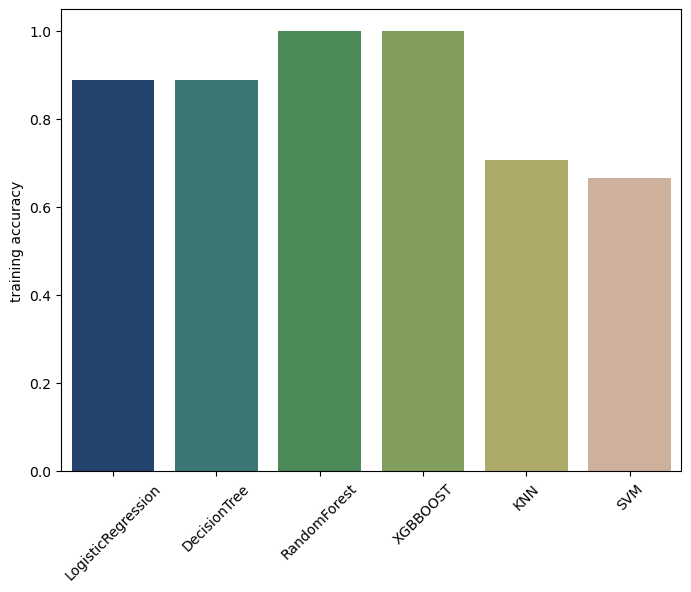

In [85]:
# Assuming 'model' is a DataFrame with an index and 'training accuracy' column
plt.figure(figsize=(8, 6))
sns.barplot(x=model.index, y=model['training accuracy'], palette='gist_earth')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


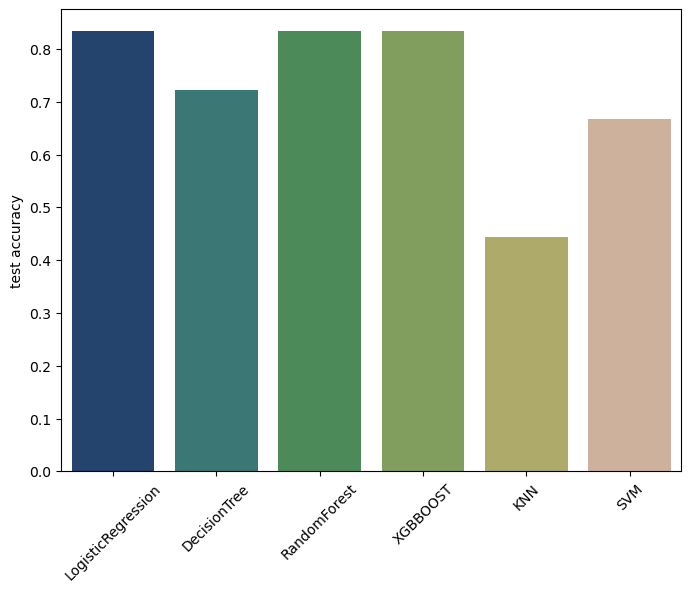

In [86]:
# Assuming 'model' is a DataFrame with an index and 'test accuracy' column
plt.figure(figsize=(8, 6))
sns.barplot(x=model.index, y=model['test accuracy'], palette='gist_earth')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

# Colclusion
-In the case of overfitting,after validation mean accuracy can be used
- Hyperparametre tuning can be used for better performance of the above model

In [93]:
import pickle
# open a file, where you ant to store the data
file = open('Space_lr.pkl', 'wb')

# dump information to that file
pickle.dump(lr, file)

In [95]:
model = open('Space_lr.pkl','rb')
logistic = pickle.load(model)

EOFError: Ran out of input

In [97]:
import pickle

# Saving the model
with open('Space_lr.pkl', 'wb') as file:
    pickle.dump(lr, file)

# Loading the model
with open('Space_lr.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [98]:
y_prediction = lr.predict(X_test)


In [102]:
from sklearn.metrics import r2_score

# Assuming y_test and y_prediction are your actual and predicted values, respectively
r2 = r2_score(y_test, y_prediction)

# Now you can use the r2 variable in your code
print("R-squared score:", r2)


R-squared score: 0.25
